In [1]:
#import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
data=pd.read_csv('telecom_churn_data.csv')

### BASIC CHECKS

In [3]:
pd.set_option("display.max_columns", None)
data.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# Rename columns of the DataFrame
data.columns = [
    "State", "Account Length", "Area Code", "Phone", "International Plan", "VMail Plan",
    "VMail Message", "Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls",
    "Eve Charge", "Night Mins", "Night Calls", "Night Charge", "International Mins",
    "International Calls", "International Charge", "CustServ Calls", "Churn"]

# Verify the column names
print(data.columns)

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')


In [5]:
data.dtypes

State                    object
Account Length            int64
Area Code                 int64
Phone                    object
International Plan       object
VMail Plan               object
VMail Message             int64
Day Mins                float64
Day Calls                 int64
Day Charge              float64
Eve Mins                float64
Eve Calls                 int64
Eve Charge              float64
Night Mins              float64
Night Calls               int64
Night Charge            float64
International Mins      float64
International Calls       int64
International Charge    float64
CustServ Calls            int64
Churn                    object
dtype: object

In [6]:
data.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [8]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Check for duplicate rows
# Count the number of duplicate rows
num_duplicates = data.duplicated().sum()
print("Number of duplicate rows: " + str(num_duplicates))

Number of duplicate rows: 0


In [10]:
# Find the total number of states

# Count the number of unique items in a specific column
num_unique_items = data['State'].nunique()

print(f"Number of unique items: {num_unique_items}")

Number of unique items: 51


In [11]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
print(data['Churn'].unique())
print(data['Churn'].dtype)

[' False.' ' True.']
object


In [13]:
#data.drop(['Phone', 'International Plan', 'VMail Plan'], axis=1, inplace=True)

In [14]:
#data.head()

In [15]:
# Convert Churn column into binary
data['Churn Binary'] = data['Churn'].apply(lambda x: 1 if x.strip() == 'True.' else 0)

# Verify the conversion
print(data[['Churn', 'Churn Binary']].tail())

        Churn  Churn Binary
4612   False.             0
4613   False.             0
4614   False.             0
4615   False.             0
4616   False.             0


In [16]:
print(data['Churn Binary'].unique())
print(data['Churn Binary'].dtype)

[0 1]
int64


In [17]:
# Convert International Plan and Voicemail Plan to binary
data['InternationalPlanBinary'] = data['International Plan'].apply(lambda x: 1 if x.strip() == 'yes' else 0)
data['VoicemailPlanBinary'] = data['VMail Plan'].apply(lambda x: 1 if x.strip() == 'yes' else 0)

In [18]:
# Print datatype of binary columns
print("Data type of International Plan Binary:", data['InternationalPlanBinary'].dtype)
print("Data type of Voicemail Plan Binary:", data['VoicemailPlanBinary'].dtype)

# Print unique values of binary columns
print("Unique values of International Plan Binary:", data['InternationalPlanBinary'].unique())
print("Unique values of Voicemail Plan Binary:", data['VoicemailPlanBinary'].unique())

Data type of International Plan Binary: int64
Data type of Voicemail Plan Binary: int64
Unique values of International Plan Binary: [0 1]
Unique values of Voicemail Plan Binary: [1 0]


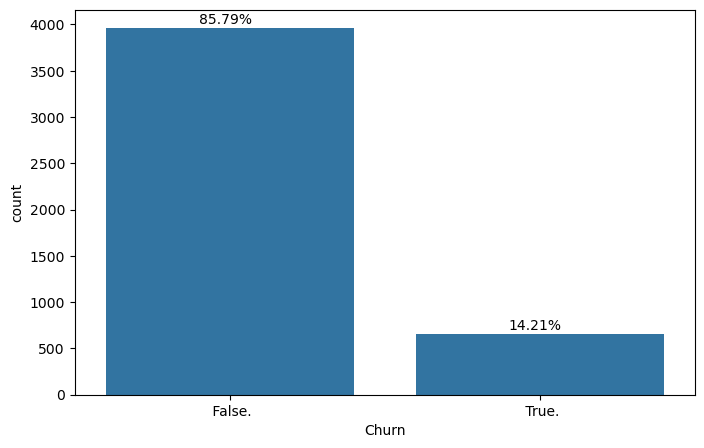

In [19]:
# Target analysis - create a plot with percentage of churn

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', data=data)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(data['Churn Binary'])),
                (p.get_x() + 0.3, p.get_height() + 50))

In [20]:
# From the above graph, it is evident that the Churn rate is 14.2 which is way above 10%.

In [21]:
# NEXT, Plotting to find the distribution

In [22]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['number']).columns

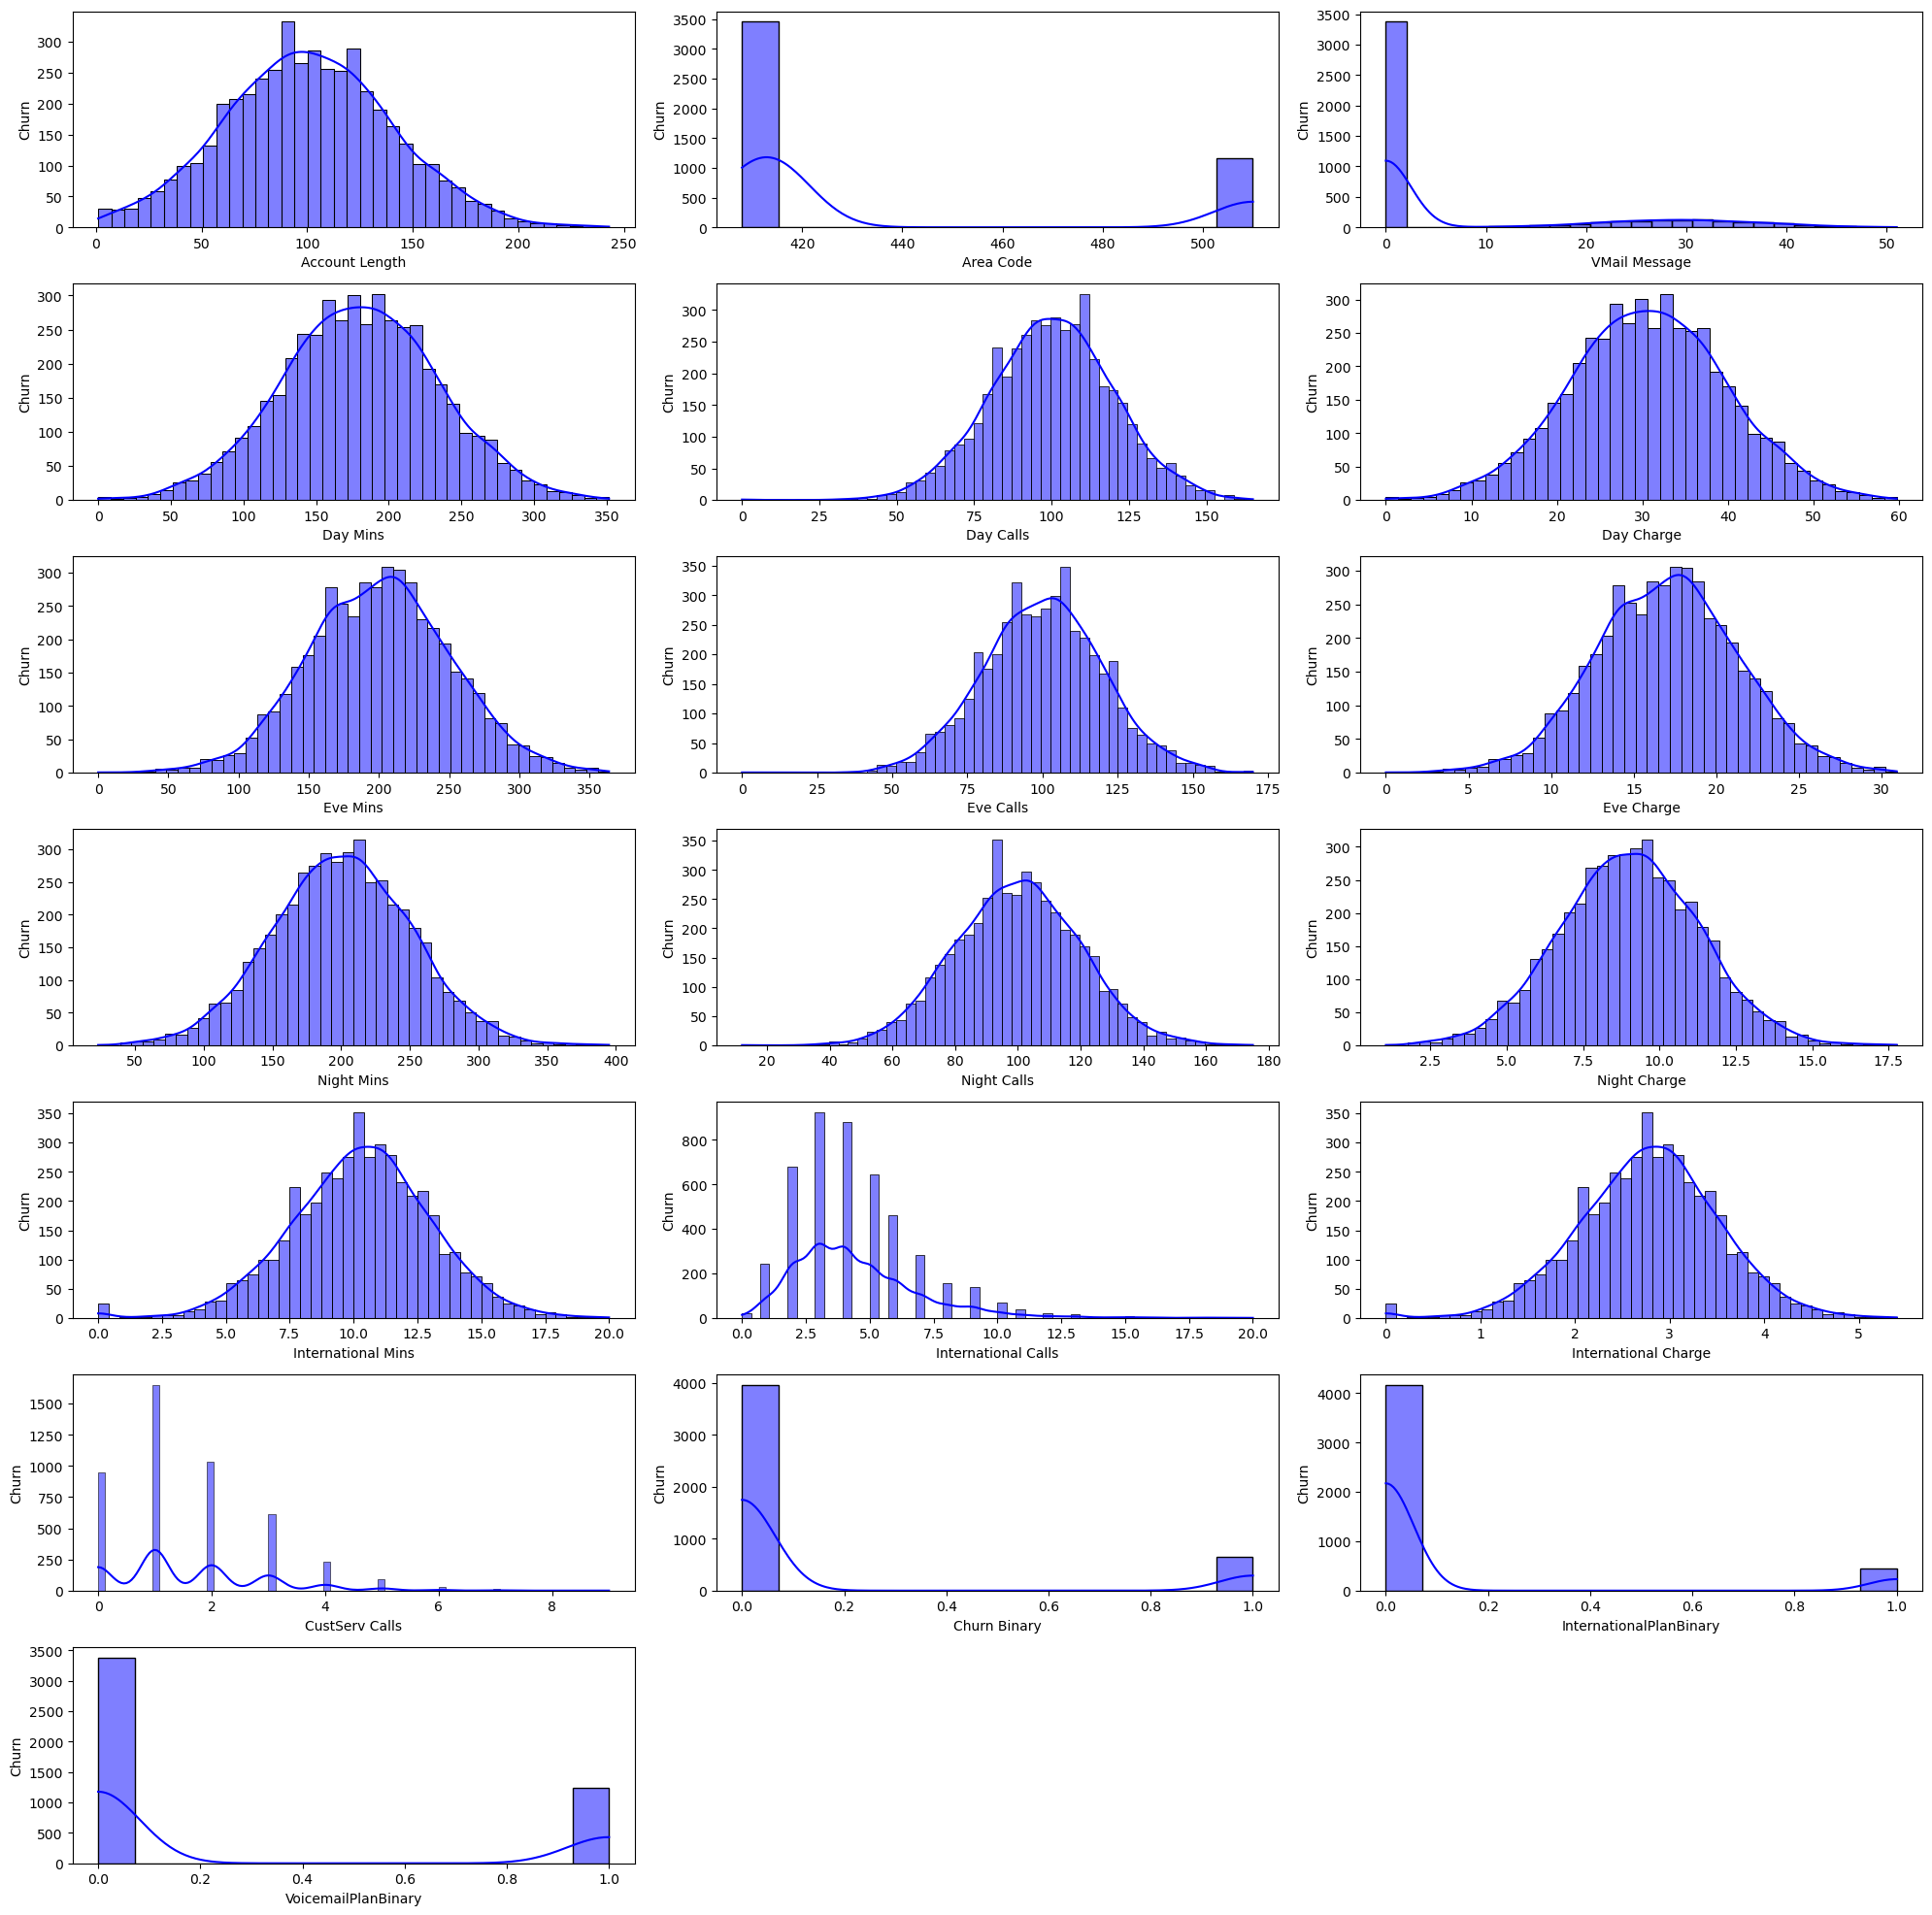

In [23]:
plt.figure(figsize=(20,25), facecolor='white') #to set canvas
plotnumber = 1 #counter
for column in numeric_columns: #accessing the columns
    if plotnumber<=21 :
        ax = plt.subplot(9,3,plotnumber)
        sns.histplot(data[column], kde=True, color='blue')
        plt.xlabel(column) #assign name to x axis and set font 20
        plt.ylabel('Churn')
    plotnumber+=1 #counter increment
plt.tight_layout()
plt.show()

In [24]:
# # Plot box plots for all numerical columns
# #for column in numeric_columns:
#     plt.figure(figsize=(4, 3))
#     sns.boxplot(x='Churn', y=column, data=data)
#     plt.title(f'Box Plot for {column} grouped by Churn')
#     plt.xlabel('Churn')
#     plt.ylabel(column)
#     plt.tight_layout()
#     plt.show()

<Axes: xlabel='State'>

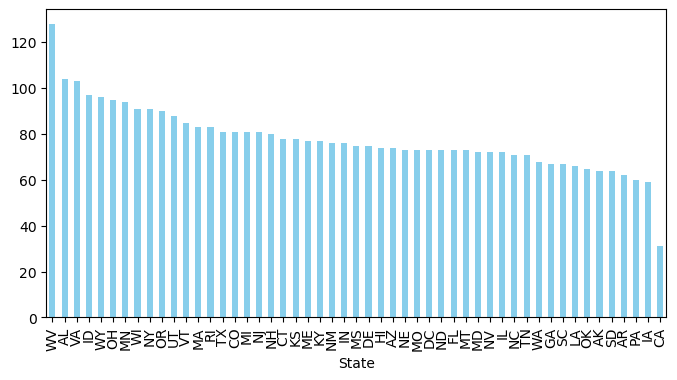

In [25]:
#Plot Churn = False vs State in asc order

# Filter the data
churn_false = data[data['Churn'] == ' False.']

# Group by state and count
grouped_by_state = churn_false.groupby('State').size()

# Sort by count descending
sorted_grouped = grouped_by_state.sort_values(ascending=False)

# Plot the sorted data
sorted_grouped.plot(kind='bar', figsize=(8, 4), color='skyblue')

<Axes: xlabel='State'>

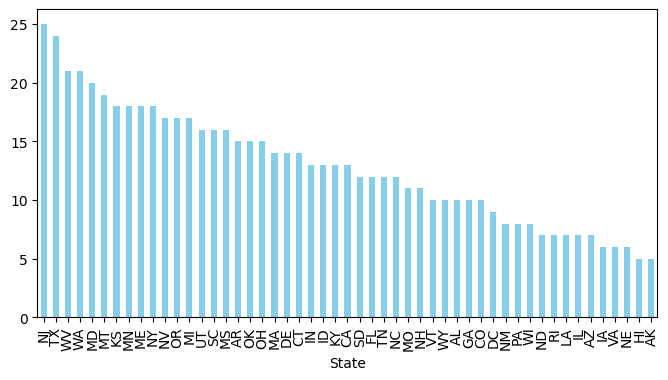

In [26]:
#Plot Churn = True vs state in asc order

# Filter the data
churn_true = data[data['Churn'] == ' True.']

# Group by state and count
grouped_by_state = churn_true.groupby('State').size()

# Sort by count descending
sorted_grouped = grouped_by_state.sort_values(ascending=False)

# Plot the sorted data
sorted_grouped.plot(kind='bar', figsize=(8,4), color='skyblue')

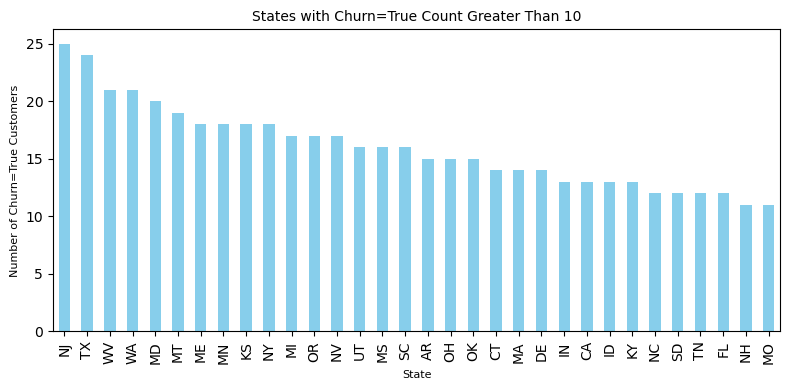

In [27]:
#Let's Plot where Churn = True is more than 10 vs state in asc order

# Filter the data where 'Churn' equals ' True.'
churn_true_10= data[data['Churn'] == ' True.']

# Group by 'State' and count the occurrences of Churn=True
grouped_by_state = churn_true_10.groupby('State').size()

# Filter states where count is greater than 10
filtered_grouped = grouped_by_state[grouped_by_state > 10]

# Sort by count in descending order
sorted_grouped = filtered_grouped.sort_values(ascending=False)

# Plot the sorted data
sorted_grouped.plot(kind='bar', figsize=(8, 4), color='skyblue')

# Add labels and title for the plot
plt.title("States with Churn=True Count Greater Than 10", fontsize=10)
plt.xlabel("State", fontsize=8)
plt.ylabel("Number of Churn=True Customers", fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

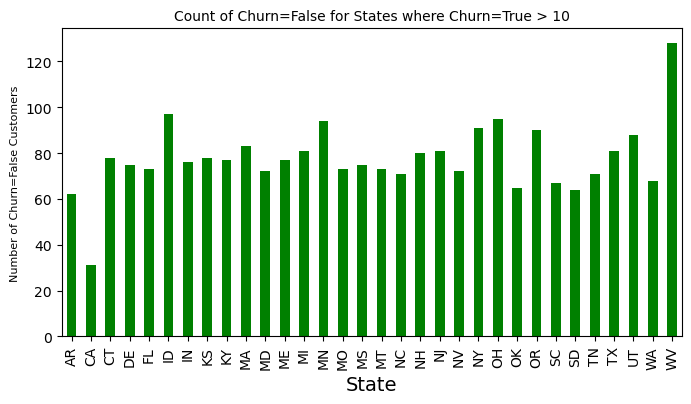

In [28]:
#plot churn = False for those states where churn=True>10

# Filter data where Churn=True
churn_true_filtered = data[data['Churn'] == ' True.']

# Group by 'State' and count occurrences of Churn=True
grouped_churn_true = churn_true_filtered.groupby('State').size()

# Identify states where Churn=True count > 10
states_with_high_churn = grouped_churn_true[grouped_churn_true > 10].index

# Filter data for Churn=False in those states
churn_false_filtered = data[(data['Churn'] == ' False.') & (data['State'].isin(states_with_high_churn))]

# Group by 'State' and count Churn=False
grouped_churn_false = churn_false_filtered.groupby('State').size()

# Plot the data
grouped_churn_false.plot(kind='bar', figsize=(8, 4), color='green')

# Add labels and title
plt.title("Count of Churn=False for States where Churn=True > 10", fontsize=10)
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of Churn=False Customers", fontsize=8)

# Show the plot
plt.show()

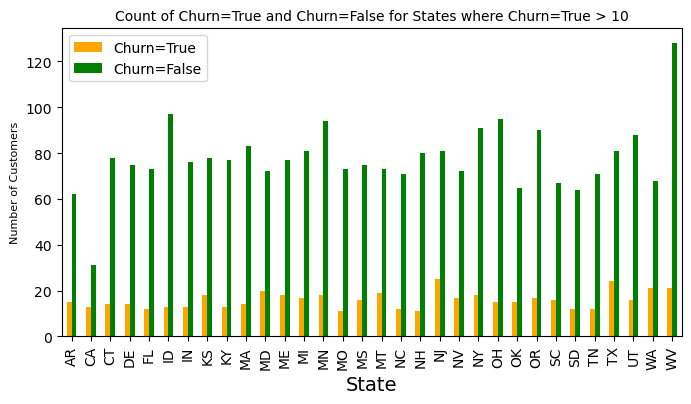

In [29]:
# Filter data for both Churn=True and Churn=False in the identified states

churn_true_filtered = data[(data['Churn'] == ' True.') & (data['State'].isin(states_with_high_churn))]
churn_false_filtered = data[(data['Churn'] == ' False.') & (data['State'].isin(states_with_high_churn))]

# Group by 'State' for both cases
grouped_churn_true = churn_true_filtered.groupby('State').size()
grouped_churn_false = churn_false_filtered.groupby('State').size()

# Combine both into a single DataFrame for plotting
combined = pd.DataFrame({
    'Churn=True': grouped_churn_true,
    'Churn=False': grouped_churn_false
}).fillna(0)  # Fill NaN values with 0

# Plot as a grouped bar chart
combined.plot(kind='bar', figsize=(8, 4), color=['orange', 'green'])

# Add labels and title
plt.title("Count of Churn=True and Churn=False for States where Churn=True > 10", fontsize=10)
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of Customers", fontsize=8)

# Show the plot
plt.show()

## COULD NOT INFER ANYTHING FROM ALL OF THE ABOVE!!!!!!!!!!!!!!!!!!!! THENGGA!!!!!

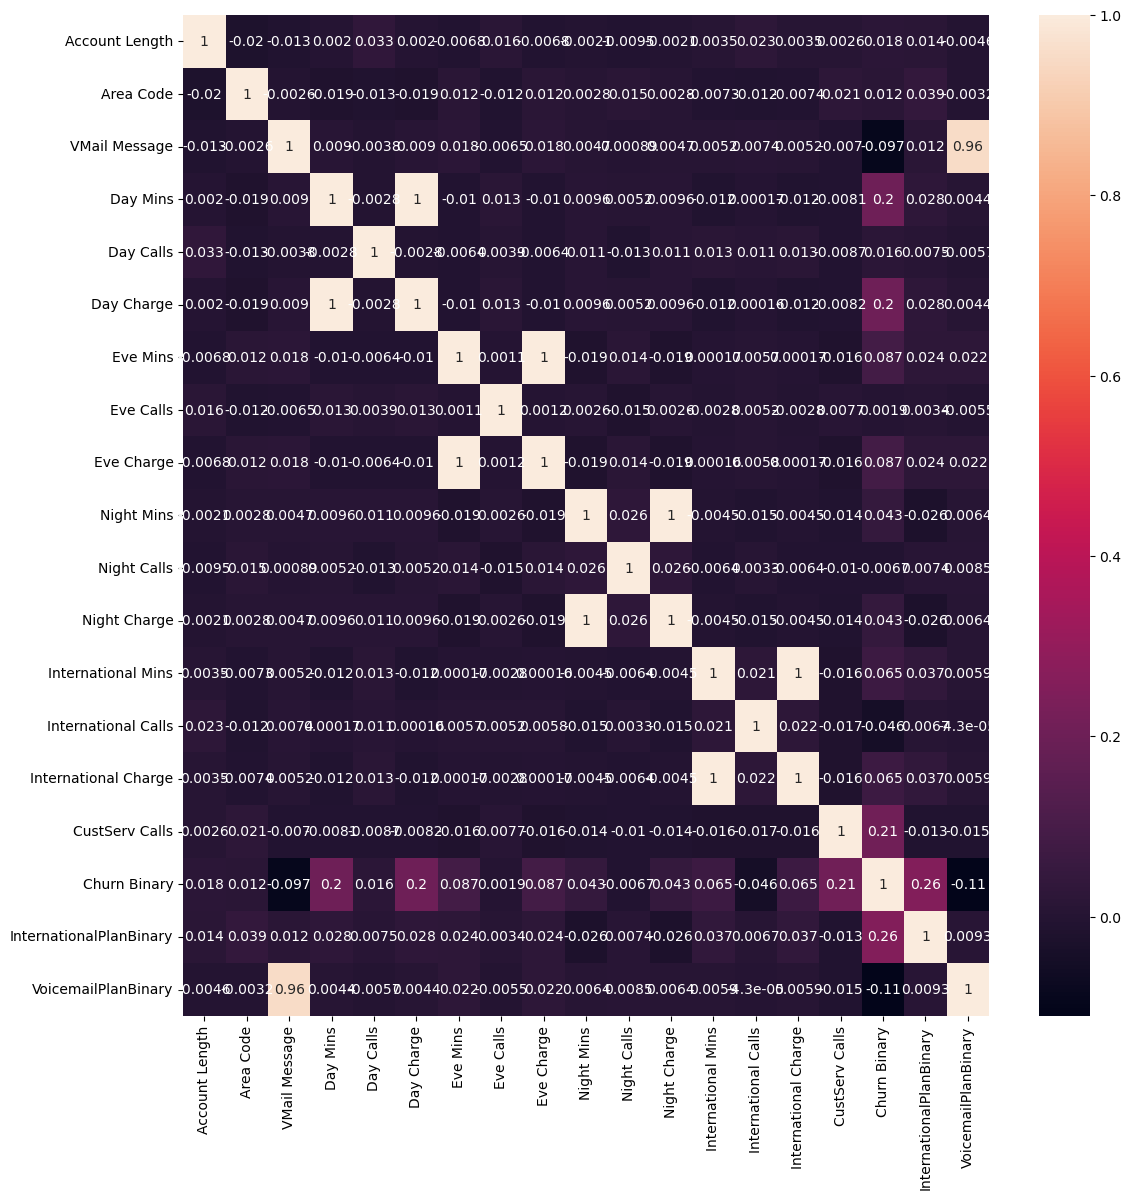

In [30]:
#Going to HEATMAP

numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=[13,13])
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

## NO DIRECT CORRELATIONS! PANDAAARAM!!!!

### Feature Engineering

In [31]:
# Customer usage pattern - behavior metric

# Calculate Total Calls
data['Total Calls'] = data['Day Calls'] + data['Eve Calls'] + data['Night Calls'] + data['International Calls']

# Calculate Day Call Ratio
data['Day Call Ratio'] = data['Day Calls'] / data['Total Calls']

# Calculate Eve Call Ratio
data['Eve Call Ratio'] = data['Eve Calls'] / data['Total Calls']

# Calculate Night Call Ratio
data['Night Call Ratio'] = data['Night Calls'] / data['Total Calls']

# Calculate International Call Ratio
data['International Call Ratio'] = data['International Calls'] / data['Total Calls']

# Inspect the newly created ratios
print(data[['Day Call Ratio', 'Eve Call Ratio', 'Night Call Ratio', 'International Call Ratio']].describe())


       Day Call Ratio  Eve Call Ratio  Night Call Ratio  \
count     4617.000000     4617.000000       4617.000000   
mean         0.328369        0.328849          0.328113   
std          0.054720        0.054639          0.055050   
min          0.000000        0.000000          0.051282   
25%          0.292899        0.292096          0.292308   
50%          0.328358        0.328402          0.326531   
75%          0.363057        0.364238          0.365188   
max          0.572650        0.593607          0.536680   

       International Call Ratio  
count               4617.000000  
mean                   0.014669  
std                    0.008168  
min                    0.000000  
25%                    0.009146  
50%                    0.013115  
75%                    0.018657  
max                    0.068966  


In [32]:
data['Day Call Ratio'].dtype

dtype('float64')

In [33]:
# Calculate correlation between call ratios and churn (assuming 'Churn' is binary: 1 for True, 0 for False)
correlation = data[['Day Call Ratio', 'Eve Call Ratio', 'Night Call Ratio', 'International Call Ratio', 'Churn Binary']].corr()

# Display the correlation matrix
print(correlation)

                          Day Call Ratio  Eve Call Ratio  Night Call Ratio  \
Day Call Ratio                  1.000000       -0.489133         -0.501581   
Eve Call Ratio                 -0.489133        1.000000         -0.498152   
Night Call Ratio               -0.501581       -0.498152          1.000000   
International Call Ratio       -0.046746       -0.055166         -0.047154   
Churn Binary                    0.015251        0.001432         -0.009446   

                          International Call Ratio  Churn Binary  
Day Call Ratio                           -0.046746      0.015251  
Eve Call Ratio                           -0.055166      0.001432  
Night Call Ratio                         -0.047154     -0.009446  
International Call Ratio                  1.000000     -0.048080  
Churn Binary                             -0.048080      1.000000  


In [34]:
# Calculate correlation between Total Calls and Churn Binary
correlation = data[['Total Calls', 'Churn Binary']].corr()

# Display the correlation matrix
print(correlation)

              Total Calls  Churn Binary
Total Calls      1.000000      0.003395
Churn Binary     0.003395      1.000000


1. Intra-Call Ratios:
- Day Call Ratio vs. Eve Call Ratio (-0.489):- Moderate negative correlation: Customers with high Day Call Ratios tend to have lower Eve Call Ratios and vice versa.

- Day Call Ratio vs. Night Call Ratio (-0.502):- Moderate negative correlation: Customers who make more calls during the day tend to make fewer calls at night.

- Eve Call Ratio vs. Night Call Ratio (-0.498):- Similar moderate negative correlation: Customers tend to favor either evening or night calls, but rarely both.

2. Call Ratios vs. International Call Ratio:
- All correlations are very weak (between -0.04 and -0.05):- No strong relationship exists between domestic call patterns (Day, Eve, Night) and International Call Ratios.
- Customers' international calling habits seem independent of when they make domestic calls.


3. Call Ratios vs. Churn Binary:
- The correlations between Day Call Ratio, Eve Call Ratio, Night Call Ratio and Churn Binary are all very close to zero (0.015, 0.001, -0.009):- This implies no significant direct relationship between call ratios and churn. Call patterns alone are not strong indicators of whether a customer will churn.

4. International Call Ratio vs. Churn Binary (-0.048):
- The weak negative correlation suggests that as international calling increases, churn likelihood decreases slightly. However, the effect is almost negligible.

5. Churn Binary Correlations:
- Churn Binary (1) correlates only weakly with all other features in this matrix, suggesting that other factors, not listed here, may be more influential in predicting churn.

Overall Insight:
- The call patterns (Day, Eve, Night, International) appear to have little direct impact on churn, based on the given correlation values.
- The weak correlations suggest that churn might depend on other variables such as:- Customer service interactions (CustServ Calls).
- Billing complaints.
- Plan mismatches (e.g., International Plan, Voicemail Plan).


In [35]:
# Calculate correlation between CustServ Calls and Churn Binary
correlation = data[['CustServ Calls', 'Churn Binary']].corr()

# Display the correlation matrix
print(correlation)


                CustServ Calls  Churn Binary
CustServ Calls        1.000000      0.209351
Churn Binary          0.209351      1.000000


In [36]:
# Calculate correlation between CustServ Calls and Churn Binary
correlation = data[['CustServ Calls', 'Churn Binary']].corr()

# Display the correlation matrix
print(correlation)


                CustServ Calls  Churn Binary
CustServ Calls        1.000000      0.209351
Churn Binary          0.209351      1.000000


This means that as the number of customer service calls increases, the likelihood of churn (indicated by Churn Binary = 1) tends to increase as well, 
though the relationship isn't particularly strong.

In [37]:
# Combine CustServ Calls with account length to better understand the churn drivers.

# Group the data by Churn Binary
grouped = data.groupby('Churn Binary')[['CustServ Calls', 'Account Length']].mean()

# Display the average values for CustServ Calls and Account Length per churn group
print(grouped)

              CustServ Calls  Account Length
Churn Binary                                
0                   1.455693      100.354456
1                   2.239329      102.400915


Cust service calls along with account length is not directly churn rate.

In [38]:
# Calculate correlation
correlation = data[['Churn Binary', 'InternationalPlanBinary', 'VoicemailPlanBinary']].corr()

# Display the correlation matrix
print(correlation)

                         Churn Binary  InternationalPlanBinary  \
Churn Binary                 1.000000                 0.257524   
InternationalPlanBinary      0.257524                 1.000000   
VoicemailPlanBinary         -0.110149                 0.009278   

                         VoicemailPlanBinary  
Churn Binary                       -0.110149  
InternationalPlanBinary             0.009278  
VoicemailPlanBinary                 1.000000  


### Analysis of variables influencing customer migration.

*Call patterns not strong indicators of if a customer will churn or not.

*Customers who frequently contact customer service are more likely to churn. - Churn risk flag

*Customers with short tenure and high call frequency are high risk - Churn risk flag

*Customers with an International Plan are slightly more likely to churn maybe because of cost issues. - Churn risk flag

*Customers with a Voicemail Plan tend to stay longer maybe because of higher satisfaction.

## Model Selection and Training

In [39]:
# Since the case is more to do with classifictaion, lets go forward with Logistic Regression, Decision tree and Random Forest.

### LOGISTIC REGRESSION

In [40]:
# Converting Categorical data into numerical using encoding

In [41]:
data = pd.get_dummies(data, columns=['State'], drop_first=True)

In [42]:
#checking
data.columns

Index(['Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn', 'Churn Binary',
       'InternationalPlanBinary', 'VoicemailPlanBinary', 'Total Calls',
       'Day Call Ratio', 'Eve Call Ratio', 'Night Call Ratio',
       'International Call Ratio', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'Stat

In [43]:
data.head()

,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Churn Binary,InternationalPlanBinary,VoicemailPlanBinary,Total Calls,Day Call Ratio,Eve Call Ratio,Night Call Ratio,International Call Ratio,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0,0,1,303,0.363036,0.326733,0.300330,0.009901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0,0,1,332,0.370482,0.310241,0.310241,0.009036,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0,0,0,333,0.342342,0.330330,0.312312,0.015015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0,1,0,255,0.278431,0.345098,0.349020,0.027451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0,1,0,359,0.314763,0.339833,0.337047,0.008357,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
#drop International plan and VMail plan as there are avaiable in binary which was created.
data = data.drop(columns=["International Plan", "VMail Plan"], axis=1)

In [45]:
# Dropping the column Phone too as it is not relevant but since we need it later, lets store it in another dataframe.

# Store phone numbers separately
phone_numbers = data['Phone']

# Drop the column from the main dataset
data = data.drop(columns=['Phone'], axis=1)


In [46]:
# Churn column as we have Churn binary

data = data.drop(columns=['Churn'], axis=1)

In [47]:
data.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn Binary,InternationalPlanBinary,VoicemailPlanBinary,Total Calls,Day Call Ratio,Eve Call Ratio,Night Call Ratio,International Call Ratio,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1,303,0.363036,0.326733,0.300330,0.009901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1,332,0.370482,0.310241,0.310241,0.009036,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,333,0.342342,0.330330,0.312312,0.015015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0,255,0.278431,0.345098,0.349020,0.027451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0,359,0.314763,0.339833,0.337047,0.008357,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Account Length            4617 non-null   int64  
 1   Area Code                 4617 non-null   int64  
 2   VMail Message             4617 non-null   int64  
 3   Day Mins                  4617 non-null   float64
 4   Day Calls                 4617 non-null   int64  
 5   Day Charge                4617 non-null   float64
 6   Eve Mins                  4617 non-null   float64
 7   Eve Calls                 4617 non-null   int64  
 8   Eve Charge                4617 non-null   float64
 9   Night Mins                4617 non-null   float64
 10  Night Calls               4617 non-null   int64  
 11  Night Charge              4617 non-null   float64
 12  International Mins        4617 non-null   float64
 13  International Calls       4617 non-null   int64  
 14  Internat

In [49]:
# Scaling - Using MinMaxScaler as it handles binary data seamlessly and there is no need to explicitly convert encoded data into binary.

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
scaled_features = scaler.fit_transform(data)

# Convert scaled features back into a DataFrame
data_scaled = pd.DataFrame(scaled_features, columns=data.columns)

# Check the first few rows of the scaled data
print(data_scaled.head())


   Account Length  Area Code  VMail Message  Day Mins  Day Calls  Day Charge  \
0        0.524793   0.068627       0.490196  0.754196   0.666667    0.754183   
1        0.438017   0.068627       0.509804  0.459744   0.745455    0.459672   
2        0.561983   0.068627       0.000000  0.692461   0.690909    0.692436   
3        0.342975   0.000000       0.000000  0.851778   0.430303    0.851740   
4        0.305785   0.068627       0.000000  0.474253   0.684848    0.474230   

   Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0  0.542755   0.582353    0.542866    0.595750     0.484663      0.595935   
1  0.537531   0.605882    0.537690    0.621840     0.558282      0.622236   
2  0.333242   0.647059    0.333225    0.374933     0.564417      0.375374   
3  0.170195   0.517647    0.170171    0.467187     0.472393      0.467424   
4  0.407754   0.717647    0.407959    0.440290     0.668712      0.440526   

   International Mins  International Calls  Internationa

### Split the data

In [50]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data_scaled.drop(columns=['Churn Binary'])  # Assuming 'Churn' is the target column
y = data_scaled['Churn Binary']

In [51]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(y_train.shape)
print(y_test.shape)

(3693,)
(924,)


In [53]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
churn_model = LogisticRegression()
churn_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
#Evaluate the model

from sklearn.metrics import classification_report

# Predict on the test set
y_pred = churn_model.predict(X_test)

# Generate evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       799
         1.0       0.44      0.19      0.27       125

    accuracy                           0.86       924
   macro avg       0.66      0.58      0.59       924
weighted avg       0.82      0.86      0.83       924



#### Now, lets try cross-validation and regularization of the model

In [55]:
# Initialize the model (Logistic Regression) for regularization with C=1.0
churn_model = LogisticRegression(C=1.0, penalty='l2', random_state=42)

In [56]:
# Perform 5-fold cross-validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(churn_model, X, y, cv=5, scoring='accuracy')

# Display individual fold scores and the mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.86580087 0.8517316  0.87215601 0.86023835 0.85807151]
Mean CV Accuracy: 0.8615996679376963


In [57]:
#### reducing features..

In [58]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # Select top k features
# selector = SelectKBest(score_func=f_classif, k=10)
# X_new = selector.fit_transform(X, y)
# print("Selected Features:", X.columns[selector.get_support()])

In [59]:
# # Re-train the model with X_new

# # Split the new reduced dataset
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [60]:
# print(y_train.shape)
# print(y_test.shape)

In [61]:
# # Initialize and train the model with X_new

# model = LogisticRegression(C=0.1, penalty='l2', random_state=42)
# model.fit(X_train, y_train)

In [62]:
# #Evaluate the model

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [63]:
# # Perform 5-fold cross-validation

# cv_scores = cross_val_score(model, X_new, y, cv=5, scoring='accuracy')
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Accuracy:", cv_scores.mean())

In [64]:
# because we got an error - cannot import name 'parse_version' from 'sklearn.utils'

#!pip install --upgrade scikit-learn

In [65]:
# import sklearn
# print(sklearn.__version__)

In [66]:
# # force reinstallation

# !pip uninstall scikit-learn -y
# !pip install scikit-learn==1.6.1

In [67]:
# #Lets try MOTE to oversample the minority class or undersample the majority class

# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

### DECISION TREE

In [68]:
# Decision Tree Classifier and related tools
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import tree # For visualizing the tree (optional)

In [69]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Create and train the model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [71]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       799
         1.0       0.75      0.71      0.73       125

    accuracy                           0.93       924
   macro avg       0.85      0.84      0.85       924
weighted avg       0.93      0.93      0.93       924

Confusion Matrix:
 [[770  29]
 [ 36  89]]


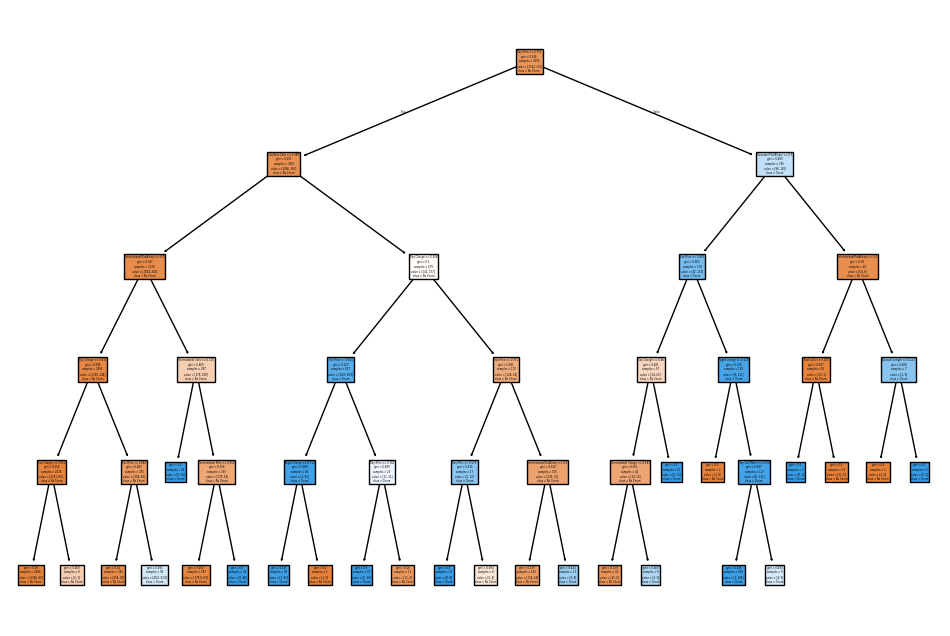

In [72]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

In [73]:
#Hypertuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9423200619015664


In [74]:
#Evaluate on the Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))

Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       799
         1.0       0.80      0.75      0.78       125

    accuracy                           0.94       924
   macro avg       0.88      0.86      0.87       924
weighted avg       0.94      0.94      0.94       924



In [75]:
# #Analyze feature importance
# importance = best_model.feature_importances_
# for feature, score in zip(X.columns, importance):
#     print(f"{feature}: {score}")

### Random Forest

In [76]:
# Essential libraries

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [79]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       799
         1.0       0.97      0.52      0.68       125

    accuracy                           0.93       924
   macro avg       0.95      0.76      0.82       924
weighted avg       0.94      0.93      0.92       924

Confusion Matrix:
 [[797   2]
 [ 60  65]]


In [80]:
#HYPERTUNING

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9415099874950036


In [81]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       799
         1.0       0.96      0.61      0.75       125

    accuracy                           0.94       924
   macro avg       0.95      0.80      0.86       924
weighted avg       0.94      0.94      0.94       924

Confusion Matrix:
 [[796   3]
 [ 49  76]]


In [84]:
!pip install --upgrade imbalanced-learn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 660.6 kB/s eta 0:00:01
   ---------------------- ----------------- 133.1/238.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [5]:
from imblearn.over_sampling import SMOTE
print("SMOTE import successful!")

SMOTE import successful!


In [6]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

import imblearn
print(f"imblearn version: {imblearn.__version__}")

scikit-learn version: 1.6.1
imblearn version: 0.13.0


In [7]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", pd.Series(y_train_resampled).value_counts())

NameError: name 'X_train' is not defined